In [31]:
import numpy as np
import time
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
%matplotlib inline
import pkg_resources

## Show time dilation between videos

In [2]:
dat_0 = np.genfromtxt(r'C:\Users\Gebruiker\Documents\HexAnalysis\Data\interim\position_log_files\2019-01-16_10-45-35\pos_log_file_0.csv', delimiter=',', skip_header=False)
dat_1 = np.genfromtxt(r'C:\Users\Gebruiker\Documents\HexAnalysis\Data\interim\position_log_files\2019-01-16_10-45-35\pos_log_file_1.csv', delimiter=',', skip_header=False)

1809.5


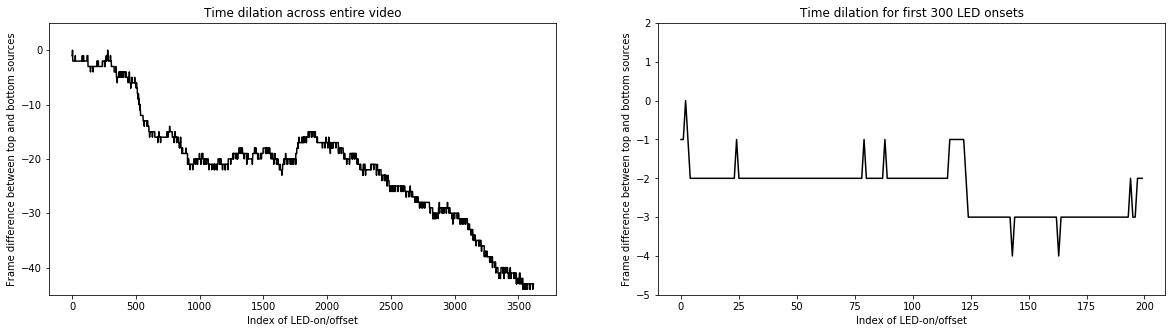

In [93]:
led_0 = dat_0[:,3]
led_1 =dat_1[:,3]
led_0_peaks = np.diff(led_0)
led_1_peaks = np.diff(led_1)
i_0 = np.sort(np.concatenate((np.where(led_0_peaks == 1)[0],np.where(led_0_peaks == -1)[0]),0))
i_1 = np.sort(np.concatenate((np.where(led_1_peaks == 1)[0],np.where(led_1_peaks == -1)[0]),0))

i_diff = i_0[:3619]-i_1
fig, ax = plt.subplots(1, 2,figsize = (20,5))

## Entire video
p = (0)
ax[p].plot(i_diff, color='k')
ax[p].set_title('Time dilation across entire video')
ax[p].set_xlabel('Index of LED-on/offset')
ax[p].set_ylabel('Frame difference between top and bottom sources')
ax[p].set_ylim(-45, 5)

## Zoom in 
p = (1)
ax[p].plot(i_diff[:200], color='k')
ax[p].set_title('Time dilation for first 300 LED onsets')
ax[p].set_xlabel('Index of LED-on/offset')
ax[p].set_ylabel('Frame difference between top and bottom sources')
ax[p].set_ylim(-5, 2)

print(len(i_diff)/2)

It is clearly visible that time dilation is happening between videos, for almost each following time peak, some dilation occurs

In [4]:
if len(led_0) > len(led_1):
    dat_0f = dat_0
    dat_1f = np.full_like(dat_0f, np.nan)
    for i in range(len(i_1)-1):
        dat_0f[i_1[i]:i_1[i]+(i_0[i+1]-i_0[i])] = dat_0[i_0[i]:i_0[i+1]]
elif len(led_0) < len(led_1):
    dat_1f = dat_1
    dat_0f = np.full_like(dat_1f, np.nan)
    for i in range(len(i_1)-1):
        dat_0f[i_1[i]:i_1[i]+(i_0[i+1]-i_0[i])] = dat_0[i_0[i]:i_0[i+1]]

C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


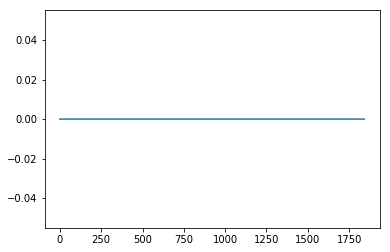

In [5]:
led_0 = dat_0f[:,3]
led_1 =dat_1f[:,3]
led_0_peaks = np.diff(led_0) > 0
led_1_peaks = np.diff(led_1) > 0
i_0 = np.where(led_0_peaks == 1)[0]
i_1 = np.where(led_1_peaks == 1)[0]
i_diff = i_0 - i_1[:len(i_0)]
plt.plot(i_diff)

In [6]:

pos_log_file_0 = open('pos_log_file_test_0.csv', 'w')
pos_log_file_1 = open('pos_log_file_test_1.csv', 'w')

for i in range(len(dat_0f)):
    pos_log_file_0.write('{}, {}, {}, {}\n'.format(dat_0f[i,0],dat_0f[i,1],dat_0f[i,2],dat_0f[i,3]))
    
for i in range(len(dat_1f)):
    pos_log_file_1.write('{}, {}, {}, {}\n'.format(dat_1f[i,0],dat_1f[i,1],dat_1f[i,2],dat_1f[i,3]))
    

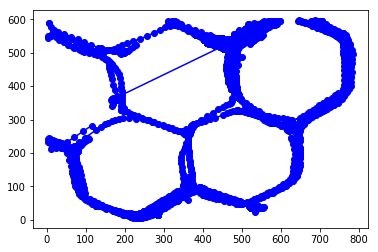

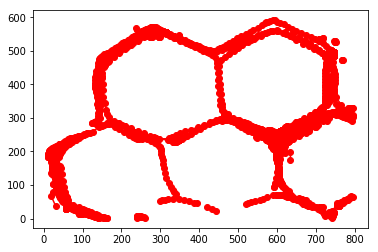

In [7]:
plt.plot(dat_0f[:,0], dat_0f[:,1], 'blue', marker = 'o')
plt.show()
plt.plot(dat_1f[:,0], dat_1f[:,1], 'red', marker = 'o')